# Chapter 5 実践編
## 5-2 データセット「Boston Housing Dataset」

In [46]:
import numpy as np
from pandas import DataFrame

from sklearn.datasets import load_boston

In [47]:
# データセットを読み込む
# （datasets/data/boston_house_prices.csvを読み込み、dictを返す）
boston = load_boston()

# データセットの説明変数(data)をDataFrameに変換
df = DataFrame(boston.data, columns=boston.feature_names)
# データセットの目的変数(target)を"MEDV"というcolumnとしてDataFrameに追加
df["MEDV"] = np.array(boston.target)

# DataFrameの最初の5行を表示
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 5-4 最小2乗法を利用してパラメータを導出
- p153: 「Dが最小値を取るとき、$w_0, w_1$ の偏微分の値は0になる」理由
  - 差の二乗は下に凸のグラフになり、1回微分した値が0のとき、最小値を取る。
  - 参考：p64, 65

### 例題
目的変数 $y$ を家賃、説明変数 $x$ を駅からの距離としたデータ表が手元にあります。

|番号|x: 駅からの距離(km)|y: 家賃(万円)|
|--|--|--|
|1|0.5|8.7|
|2|0.8|7.5|
|3|1.1|7.1|
|4|1.5|6.8|

このとき、家賃と距離との関係が直線 $y = w_0 + w_1 x$ の関係にあると仮定するとき、最も当てはまりのよい重み $w_0, w_1$ を求めなさい。

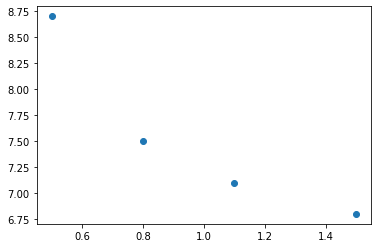

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

# 家賃と距離を散布図として表示する
distance = [0.5, 0.8, 1.1, 1.5]
rent = [8.7, 7.5, 7.1, 6.8]
plt.scatter(distance, rent)
plt.show()

最小二乗法の合計距離を $D$ とすると
$$
\begin{align*}
D & =\sum _{l=1}^{4}\{y_{l} -( w_{o} +w_{1} x_{l})\}^{2}\\
 & =\{8.7-( w_{0} +0.5w_{1})\}^{2} +\{7.5-( w_{0} +0.8w_{1})\}^{2} +\{7.1-( w_{0} +1.1w_{1})\}^{2} +\{6.8-( w_{0} +1.5w_{1})\}^{2}\\
 & =( 8.7-w_{0} -0.5w_{1})^{2} +( 7.5-w_{0} -0.8w_{1})^{2} +( 7.1-w_{0} -1.1w_{1})^{2} +( 6.8-w_{0} -1.5w_{1})^{2}\\
 & =\left( 75.69+w_{0}^{2} +0.25w_{1}^{2} -17.4w_{0} +w_{0} w_{1} -8.7w_{1}\right) +\left( 56.25+w_{0}^{1} +0.64w_{1}^{2} -15w_{0} +1.6w_{0} w_{1} -12w_{1}\right) +\\
 & \ \ \ \ \ \left( 50.41+w_{0}^{2} +2.25w_{1} -13.6w_{0} +3w_{0} w_{1} -20.4w_{1}\right) +\left( 46.24+w_{0}^{2} +2.25w_{1}^{2} -13.6w_{0} +3w_{0} w_{1} -20.4w_{1}\right)\\
 & =4w_{0}^{2} +4.35w_{1}^{2} +7.8w_{0} w_{1} -60.2w_{0} -56.72w_{1} +228.59
\end{align*}
$$
$D$ が最小値を取るとき、$w_0, w_1$の偏微分の値は0になるため、
$$
\begin{align*}
\frac{\partial D}{\partial w_{0}} & =8w_{0} +7.8w_{1} +60.2=0\\
\frac{\partial D}{\partial w_{1}} & =8.7w_{1} +7.8w_{0} -56.72=0
\end{align*}
$$
この連立方程式を解くと、
$$
\begin{align*}
y & =-1.8037x+9.2836
\end{align*}
$$
となる。

$y=-1.8037x+9.2836$ をグラフに描画してみる。

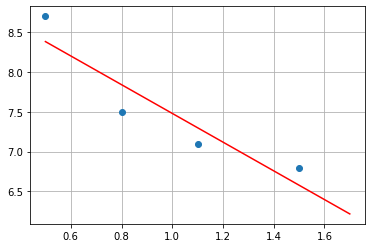

In [49]:
# 直線のx, yを設定
x = np.arange(min(distance), 1.8, 0.1)
y = -1.8037 * x + 9.2836

# y = 1.83037x + 9.2836 をグラフにプロット
plt.plot(x, y, color="red")
# 家賃と距離のデータをグラフにプロット
plt.plot(distance, rent, "o")

# グリッド線を表示
plt.grid(True)
# グラフを表示
plt.show()